In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

test2 = pd.read_csv('./서울특별시 코로나19 확진자 발생동향.csv', encoding='euc-kr')
test2.head(2)

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
0,2021.12.07.00,168705,2120,28838,138628,1090,1239,NaN,NaN,NaN,...,411358,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021.12.06.00,166586,1408,27834,137538,900,1214,NaN,NaN,NaN,...,409041,3893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [16]:
test3= test2.iloc[:,[0,1,6]]
test3

,서울시 기준일,서울시 확진자,서울시 사망
0,2021.12.07.00,168705,1239
1,2021.12.06.00,166586,1214
2,2021.12.05.00,165178,1193
3,2021.12.04.00,163146,1178
4,2021.12.03.00,160873,1148
...,...,...,...
662,2020.02.09.18,10,0
663,2020.02.08.18,10,0
664,2020.02.07.18,10,0
665,2020.02.06.09,11,0


In [17]:
test4=test2.iloc[:,[0,11,15]]
test4.head()

,서울시 기준일,전국 확진,전국 사망
0,2021.12.07.00,482310,3957
1,2021.12.06.00,477358,3893
2,2021.12.05.00,473034,3852
3,2021.12.04.00,467907,3809
4,2021.12.03.00,462555,3739


In [18]:
# In[5]:


test5= test2[['서울시 기준일','서울시 확진자','서울시 사망','전국 확진','전국 사망']]
test5.head()


# In[6]:


test6= test5[test5['서울시 기준일'].str.contains('2021')]
test6.head()
# In[21]:

,서울시 기준일,서울시 확진자,서울시 사망,전국 확진,전국 사망
0,2021.12.07.00,168705,1239,482310,3957
1,2021.12.06.00,166586,1214,477358,3893
2,2021.12.05.00,165178,1193,473034,3852
3,2021.12.04.00,163146,1178,467907,3809
4,2021.12.03.00,160873,1148,462555,3739


In [38]:
def func(x):
    return x[0:7]

In [40]:
test6['서울시 기준월'] = test6['서울시 기준일'].apply(func)
test6

,서울시 기준일,서울시 확진자,서울시 사망,전국 확진,전국 사망,서울시 기준월
0,2021.12.07.00,168705,1239,482310,3957,2021.12
1,2021.12.06.00,166586,1214,477358,3893,2021.12
2,2021.12.05.00,165178,1193,473034,3852,2021.12
3,2021.12.04.00,163146,1178,467907,3809,2021.12
4,2021.12.03.00,160873,1148,462555,3739,2021.12
...,...,...,...,...,...,...
331,2021.01.05.00,20338,204,64979,1007,2021.01
332,2021.01.04.00,20138,193,64264,981,2021.01
333,2021.01.03.00,19809,189,63244,962,2021.01
334,2021.01.02.00,19614,186,62593,942,2021.01


In [49]:
df = pd.DataFrame(test6.groupby('서울시 기준월').sum()).reset_index()
df

,서울시 기준월,서울시 확진자,서울시 사망,전국 확진,전국 사망
0,2021.01,686445,7999,2203999,37480
1,2021.02,736241,9887,2352539,42502
2,2021.03,934927,12590,2989531,51888
3,2021.04,1048475,13141,3376149,53527
4,2021.05,1310996,15022,4207738,60719
5,2021.06,1407501,15098,4467984,59734
6,2021.07,1770523,16251,5452657,63646
7,2021.08,2226916,17290,6987002,67502
8,2021.09,2675873,18353,8401619,71486
9,2021.10,3430507,22225,10533724,82306


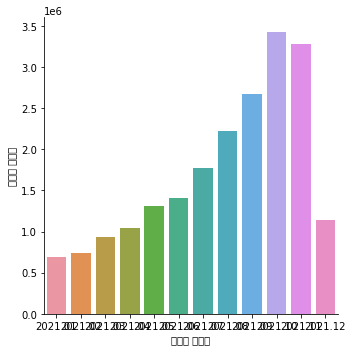

In [50]:
sns.catplot(x="서울시 기준월", y="서울시 확진자", data=df, kind='bar')

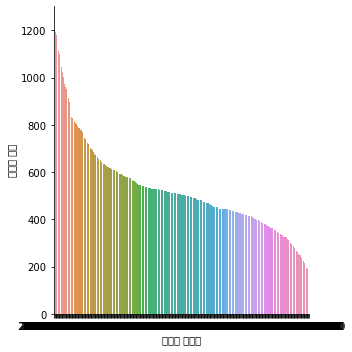

In [21]:
sns.catplot(x="서울시 기준일", y="서울시 사망", data=test6, kind='bar')